In [1]:
!pip install tensorflow matplotlib opencv-python mediapipe scikit-learn

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.5.tar.gz (26 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.w

In [2]:
!pip install imageio imgaug

  Using cached imageio-2.34.2-py3-none-any.whl.metadata (4.9 kB)
  Using cached imgaug-0.4.0-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached tifffile-2024.6.18-py3-none-any.whl.metadata (31 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached imageio-2.34.2-py3-none-any.whl (313 kB)
Using cached imgaug-0.4.0-py2.py3-none-any.whl (948 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.2/12.8 MB 11.5 MB/s eta 0:00:02
   - -------------------------------------- 0.3/12.8 MB 4.2 MB/s eta 0:00:03
   - -------------------------------------- 0.6/12.8 MB 4.8 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/12.8 MB 6.4 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.8 MB 4.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/12.8 MB 3.7 MB/s eta 0:00:04
   --- ---------------------

In [1]:
import cv2
import os 
import time
from matplotlib import pyplot as plt 
import mediapipe as mp
import numpy as np

In [2]:
mp_holistic =mp.solutions.holistic
mp_drawing=mp.solutions.drawing_utils

In [3]:
def draw_landmarks(image, result):
    # Define drawing specifications
    face_landmark_style = mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1)
    face_connection_style = mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
    
    hand_landmark_style = mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=2)
    hand_connection_style = mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
    
    pose_landmark_style = mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2)
    pose_connection_style = mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
    
    # Draw face landmarks and connections
    mp_drawing.draw_landmarks(
        image, 
        result.face_landmarks, 
        mp_holistic.FACEMESH_CONTOURS, 
        landmark_drawing_spec=face_landmark_style, 
        connection_drawing_spec=face_connection_style
    )
    
    # Draw right hand landmarks and connections
    mp_drawing.draw_landmarks(
        image, 
        result.right_hand_landmarks, 
        mp_holistic.HAND_CONNECTIONS, 
        landmark_drawing_spec=hand_landmark_style, 
        connection_drawing_spec=hand_connection_style
    )
    
    # Draw left hand landmarks and connections
    mp_drawing.draw_landmarks(
        image, 
        result.left_hand_landmarks, 
        mp_holistic.HAND_CONNECTIONS, 
        landmark_drawing_spec=hand_landmark_style, 
        connection_drawing_spec=hand_connection_style
    )
    
    # Draw pose landmarks and connections
    mp_drawing.draw_landmarks(
        image, 
        result.pose_landmarks, 
        mp_holistic.POSE_CONNECTIONS, 
        landmark_drawing_spec=pose_landmark_style, 
        connection_drawing_spec=pose_connection_style
    )

In [4]:
def mediapipe_detection(image,model):
 image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 image.flags.writeable =False
 results = model.process(image)
 image.flags.writeable=True
 image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
 return image ,results;

In [ ]:
cap = cv2.VideoCapture(0)


with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
 while cap.isOpened():
    ret ,frame = cap.read()
    print('result is {}'.format(ret))
    image,results=mediapipe_detection(frame ,holistic)
    
    draw_landmarks(image,results)
    cv2.imshow("Real time feed" , image)
    if cv2.waitKey(10) & 0xFF==ord("q"):
       break
 cap.release()
 cv2.destroyAllWindows()

result is True


D:\FYP\Gesture decode system\action\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True
result is True


In [8]:
draw_landmarks(frame , results)


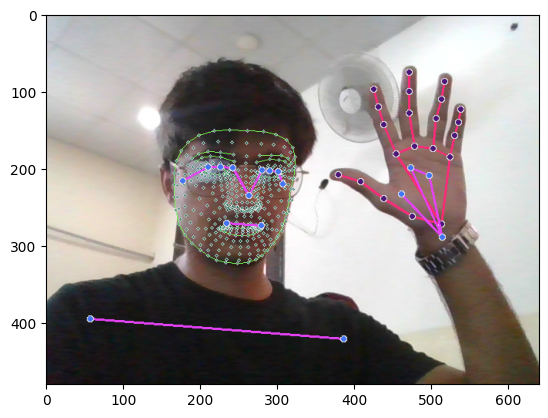

In [9]:
plt.imshow(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))

In [14]:
results.pose_landmarks.landmark

AttributeError: 'google._upb._message.RepeatedCompositeContainer' object has no attribute 'shape'

In [9]:
# newTest=[]
# for res in results.pose_landmarks.landmark:
#     test=np.array([res.x , res.y , res.z ,res.visibility])
#     newTest.append(test);
    
# pose =np.array(newTest).flatten()
# pose

In [15]:
def extract_keypoints(results):
    right_hand=np.array([[res.x ,res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    left_hand=np.array([[res.x ,res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    face=np.array([[res.x ,res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    pose=np.array([[res.x ,res.y, res.z , res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    return np.concatenate([pose , face , left_hand , right_hand])

In [16]:
len(extract_keypoints(results))

1662

In [17]:
sequnece_number = 30

Data_Path = os.path.join('Dataset')
PSL_dataset = os.path.join('PSL Dataset')



#print(Data_Path)
print(PSL_dataset)
no_of_sequence = 30
frame_no = 30
start_folder = 0

actions = np.array(['Abdomen','Ankle', 'Back','Blood','Body','Brain','Elbow' ,'Fist','Heart','Jaw','Knuckle','Lips','Lungs','Mouth', 'Nerve' ,'Nose' ,'Palm','Skull','Thumb'])
        

PSL Dataset


In [18]:
count=0
for action in actions:
    file = os.path.join(PSL_dataset, action)
    file_count = len(os.listdir(file))
    count=count+file_count
    print('For {}, the number of videos :"{}"   '.format(action, file_count))
    
    # Create directories for each sequence under DATA_PATH/action/sequence
    for sequence in range(file_count):
        try:
            os.makedirs(os.path.join(Data_Path, action, str(sequence)), exist_ok=True)
        except FileExistsError:
            pass  # Directory already exists, so ignore

print('Total Sequences are: {}'.format(count))


For Abdomen, the number of videos :"30"   
For Ankle, the number of videos :"30"   
For Back, the number of videos :"30"   
For Blood, the number of videos :"30"   
For Body, the number of videos :"30"   
For Brain, the number of videos :"30"   
For Elbow, the number of videos :"30"   
For Fist, the number of videos :"30"   
For Heart, the number of videos :"30"   
For Jaw, the number of videos :"30"   
For Knuckle, the number of videos :"30"   
For Lips, the number of videos :"30"   
For Lungs, the number of videos :"30"   
For Mouth, the number of videos :"30"   
For Nerve, the number of videos :"30"   
For Nose, the number of videos :"30"   
For Palm, the number of videos :"30"   
For Skull, the number of videos :"30"   
For Thumb, the number of videos :"30"   
Total Sequences are: 570


In [19]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa

In [13]:
def startFolder(action):
    folders=os.path.join(Data_Path,action) 
    folder_list = os.listdir(folders)
    entries = sorted(folder_list, key=lambda x: int(x.split('.')[0]))
    for f in entries:
        data = os.path.join(Data_Path,action,f)
        num = os.listdir(data)
        if len(num)==0:
            return f    

def DataCollectiion(trainDataset,trainType):
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        cap = cv2.VideoCapture('')
        # NEW LOOP
        # Loop through actions
#         actions = ['Ankle']
        for action in actions:
            files=os.path.join(trainDataset,action) 
            file_list = os.listdir(files)

            no_of_sequences=len(file_list)
            print(action," Videos \t= ",no_of_sequences)
            
            # Loop through sequences aka videos
            for sequence in range(start_folder, start_folder+no_of_sequences):
                cap = cv2.VideoCapture(os.path.join(trainDataset, action,str(sequence)+".mp4"))
                print(os.path.join(trainDataset, action,str(sequence)+".mp4"))
#               Calculating frames
                frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
                fps = cap.get(cv2.CAP_PROP_FPS)
                duration = frame_count/fps
                duration = (duration/32)*1000
                count = 0
                print("Trainig Type: ",trainType)
                print("Frame Count",frame_count)
                print("fps",fps)
                print("Duration",duration)
                print("Update: ",duration/30)
                print("Frame Time: ",duration)

                # saving folder
                folder = startFolder(action)
                
                # Loop through video length aka sequence length
                for frame_num in range(sequence_length):

                    # Read feed
                    ret, frame = cap.read()
    #                 skipping frames
                    cap.set(cv2.CAP_PROP_POS_MSEC, (count*duration))    
                    # move the time
                    success,image = cap.read()
                    count += 1
#                     print(sequence,ret,frame_num)
    #                 print(frame)

#                   horizontal
                    if(trainType=='horizontal'):
                        hflip = iaa.Fliplr(p=1.0)
                        frame = hflip.augment_image(frame)
#                     rotate left
                    elif (trainType=='left'):
                        rot1 = iaa.Affine(rotate=(-10,-9))
                        frame = rot1.augment_image(frame)
#                     rotate right
                    elif (trainType=='right'):
                        rot1 = iaa.Affine(rotate=(9,10))
                        frame = rot1.augment_image(frame)
                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)

                    # Draw landmarks
                    draw_styled_landmarks(image, results)

                    # NEW Apply wait logic
                    if frame_num == 0: 
                        cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
#                         cv2.imshow('OpenCV Feed', image)
#                         cv2.waitKey(1000)
                    else: 
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
    #                     Show to screen
#                         cv2.imshow('OpenCV Feed', image)
    #                     cv2.waitKey(round((duration/30)*1000))


                    # NEW Export keypoints
                    keypoints = extract_keypoints(results)
#                     if(trainType=='horizontal'):
#                         npy_path = os.path.join(DATA_PATH, action, str(sequence+no_sequences), str(frame_num))
#                     elif (trainType=='left'):
#                         npy_path = os.path.join(DATA_PATH, action, str(sequence+(no_sequences*2)), str(frame_num))
#                     elif (trainType=='right'):
#                         npy_path = os.path.join(DATA_PATH, action, str(sequence+(no_sequences*3)), str(frame_num))
#                     else:
                    npy_path = os.path.join(Data_Path, action, folder, str(frame_num))
                    np.save(npy_path, keypoints)
#                     print("npy Frame: ",npy_path)
                    # Break gracefully
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break

        cap.release()
        cv2.destroyAllWindows()

In [65]:
 DataCollection(PSL_dataset,'horizontal')

Ankle  Videos 	=  30
PSL Dataset\Ankle\0.mp4
Trainig Type:  horizontal
Frame Count 123.0
fps 25.083333333333332
Duration 153.23920265780734
Update:  5.1079734219269115
Frame Time:  153.23920265780734


D:\FYP\Gesture decode system\action\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


TypeError: join() argument must be str, bytes, or os.PathLike object, not 'NoneType'

In [20]:


label_map = {label:num for num , label in enumerate(actions)}


label_map['Ankle']

1

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
sequences, labels = [], []
for action in actions:
#     for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
    
    #iterate through 30 videos of one action
    for sequence in range(30):  
        window = []
    #iterate through 30 frames of one video
        for frame_num in range(30):
            res = np.load(os.path.join(Data_Path, action, str(sequence), "{}.npy".format(frame_num)))

            #print((os.path.join(Data_Path, action, str(sequence), "{}.npy".format(frame_num))))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [17]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,


In [18]:
array_labels = np.array(labels)
len(array_labels)

570

In [19]:
np.array(sequences).shape

(570, 30, 1662)

In [20]:
np.array(labels).shape

(570,)

In [21]:
X = np.array(sequences)
X
# type(X)

array([[[ 0.61833811,  0.37042859, -0.45956802, ...,  0.38950568,
          0.78761321,  0.02745482],
        [ 0.60516882,  0.35462555, -0.18985219, ...,  0.38671213,
          0.78599757,  0.00843955],
        [ 0.59022868,  0.3600902 , -0.73842597, ...,  0.38649458,
          0.79229474,  0.00580828],
        ...,
        [ 0.59001142,  0.3551887 , -1.09721589, ...,  0.36765546,
          0.79833817, -0.00428992],
        [ 0.59016979,  0.35508233, -1.05702317, ...,  0.36379585,
          0.79819882, -0.00178784],
        [ 0.5911389 ,  0.35598749, -1.17667627, ...,  0.35837927,
          0.79721338,  0.00326307]],

       [[ 0.5529719 ,  0.41368279, -0.88690716, ...,  0.36479712,
          0.79888636,  0.00732908],
        [ 0.53515756,  0.40554762, -0.67818391, ...,  0.36340255,
          0.79701763, -0.00987534],
        [ 0.53115219,  0.40500817, -0.98006421, ...,  0.36200026,
          0.79839385, -0.00780596],
        ...,
        [ 0.54196095,  0.41602606, -1.03377974, ...,  

In [22]:
X.shape

(570, 30, 1662)

In [23]:
Y = to_categorical(labels).astype(int)

In [24]:
Y.shape

(570, 19)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)

In [26]:
y_test.shape

(29, 19)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import os

In [28]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [29]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

D:\FYP\Gesture decode system\action\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [79]:
model.fit(X_train, y_train, epochs=1500, callbacks=[tb_callback])

Epoch 1/1500
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - categorical_accuracy: 0.0435 - loss: 2.9554
Epoch 2/1500
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - categorical_accuracy: 0.0467 - loss: 2.9470
Epoch 3/1500
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - categorical_accuracy: 0.0731 - loss: 2.9408
Epoch 4/1500
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - categorical_accuracy: 0.0959 - loss: 2.9180
Epoch 5/1500
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - categorical_accuracy: 0.0711 - loss: 2.8961
Epoch 6/1500
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - categorical_accuracy: 0.0504 - loss: 2.8965
Epoch 7/1500
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - categorical_accuracy: 0.0801 - loss: 2.9211
Epoch 8/1500
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - categorical_accuracy: 0.0639 - loss: 2.9421
Epoch 9/1500
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - categorical_accuracy: 0.0764 - loss: 2.9243
Epoch 10/1500
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - categorical_accuracy: 0.0908 - loss: 2.8485
Epoch 11/

KeyboardInterrupt: 

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 19)                  │             627 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 597,203 (2.28 MB)

 Trainable params: 597,203 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.save('Final2.h5')
    
    

In [33]:
model.load_weights('Final.h5')

In [62]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
from matplotlib import pyplot as plt


In [36]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [37]:
ytrue = np.argmax(y_test , axis=1).tolist()
yhat = np.argmax(yhat , axis=1).tolist()

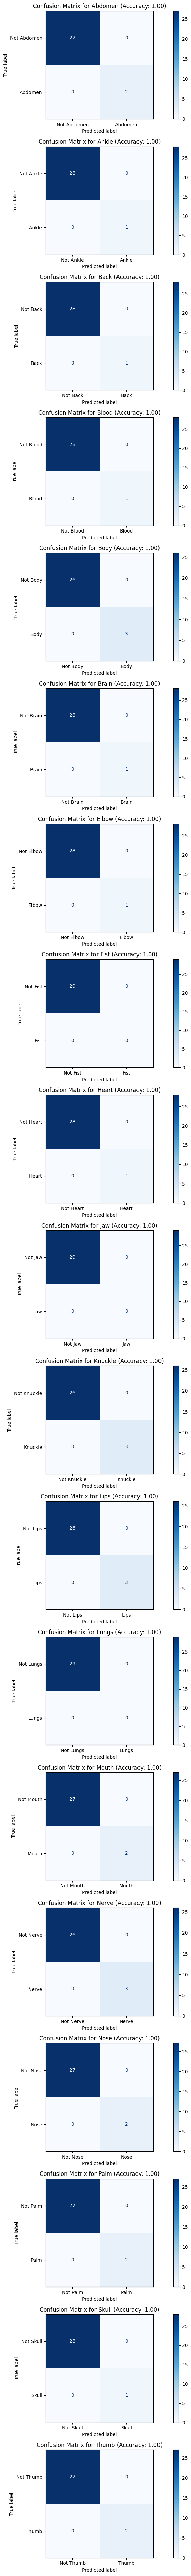

In [71]:
confusion_matrix = multilabel_confusion_matrix(ytrue, yhat, labels=range(len(actions)))

# Compute accuracy for each action
accuracies = []
for i in range(len(actions)):
    action_true = [1 if yt == i else 0 for yt in ytrue]
    action_pred = [1 if yh == i else 0 for yh in yhat]
    accuracies.append(accuracy_score(action_true, action_pred))

fig, axes = plt.subplots(nrows=len(actions), ncols=1, figsize=(12, 4*len(actions)))  # Adjust size as needed

for i, (cm, action, accuracy) in enumerate(zip(confusion_matrix, actions, accuracies)):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Not {action}', action])
    if len(actions) > 1:
        disp.plot(ax=axes[i], cmap='Blues', values_format='d')
        axes[i].set_title(f"Confusion Matrix for {action} (Accuracy: {accuracy:.2f})")
    else:
        disp.plot(ax=axes, cmap='Blues', values_format='d')
        axes.set_title(f"Confusion Matrix for {action} (Accuracy: {accuracy:.2f})")

plt.tight_layout()
plt.show()

In [39]:
res = model.predict(X_test)
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [37]:
actions[np.argmax(res[4])]

'Skull'

In [92]:
def test_Video(video):
    def printFind(pred):
        for n in pred:
            print(actions[n])
        print('---------')

    sequence, sentence, predictions = [], [], []
    threshold = 0.5

    cap = cv2.VideoCapture(video)
    frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    fps = cap.get(cv2.CAP_PROP_FPS)
    duration = (frame_count / fps / 35) * 1000
    count = 0

    with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            cap.set(cv2.CAP_PROP_POS_MSEC, count * duration)
            success, frame = cap.read()
            count += 1
            if not success:
                break

            frame, results = mediapipe_detection(frame, holistic)
            draw_landmarks(frame, results)

            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-30:]

            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                predictions.append(np.argmax(res))
                printFind(predictions)
                print("Max:", actions[np.argmax(res)])

                if np.unique(predictions[-10:])[0] == np.argmax(res) and res[np.argmax(res)] > threshold:
                    if not sentence or actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5:
                    sentence = sentence[-5:]

            # Resize frame for display
            resized_frame = cv2.resize(frame, (1024, 768))  # Resize to 1024x768

            cv2.rectangle(resized_frame, (0, 0), (1024, 40), (245, 117, 16), -1)
            cv2.putText(resized_frame, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.imshow('OpenCV Feed', resized_frame)
            

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()

In [93]:
video = os.path.join('General Dataset','General Dataset/','Blood','1.mp4')
test_Video(video)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Blood
---------
Max: Blood
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Blood
Blood
---------
Max: Blood
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Blood
Blood
Blood
---------
Max: Blood
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Blood
Blood
Blood
Blood
---------
Max: Blood
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Blood
Blood
Blood
Blood
Blood
---------
Max: Blood


In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Mouth
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Mouth
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Mouth
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Mouth
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Mouth
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Mouth
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Mouth
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Mouth
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Mouth
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Nose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Nose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Nose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Nose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Nose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Nose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Nose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Nose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Nose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Nose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Nose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Nose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Nose
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Mouth
1

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [12]:
cap = cv2.VideoCapture('2.mp4')

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, fps, (width, height))

# Process video
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        image, results = mediapipe_detection(frame, holistic)
        
        draw_landmarks(image, results)
        
        # Write the frame into the file
        out.write(image)
        
        cv2.imshow('video', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release everything
cap.release()
out.release()
cv2.destroyAllWindows()